In [309]:
import pandas as pd
import numpy as np

In [310]:
df=pd.read_csv("../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

## Business Understanding
Placement is a time of fear for most students. All the students have questions regarding what are the best practices that need to be followed to get better placement and what are the parameters that would be checked by the recruitment officers at the time placement. Here is an attempt to understand the trends in placements
Q1 Is work experience affecting the placement statics?
Q2 Are percentage really helpful for getting placed?
Q3 Which streams have a better chance of getting placed?
Q4 Which stream enables chances at getting better salary?

## Data Understanding
The following cells are used to derive insights into the data and understand different aspects of data

Its important to find if the data has null vaalues or not, filling the null values is importan for modelling

In [311]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

We can find that all columns except salary 'column' is filled and there are 67 null values in salry which need to be filled

Since the salary coluumn is filled with numerical data and lets assume that all the people have a genral trend and so we fill the null values in salary column with mean of the column

In [312]:
df['salary']=df['salary'].fillna(df['salary'].mean()) #filling  the null values in salary with mean

In [313]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


Here we look at the gender column and have separate column for males and females to have better visualization

In [314]:
data=pd.get_dummies(df['gender']) #creating dummies of gender column to get separate column for males and females

In [315]:
df_N=df.join(data)

In [316]:
df_N.head()# data frame object containing dummy values for gender column

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,F,M
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,0,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,0,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,0,1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,0,1
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,0,1


The following function is used to find if the person with a particular serial number is placed or not

In [367]:
def get_status(id):
    '''
    Input: serial number of person
    Output: the status of person
    '''
    status=df_N[df_N['sl_no']==id]['status']
    return status

In [368]:
get_status(4)

3    Not Placed
Name: status, dtype: object

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

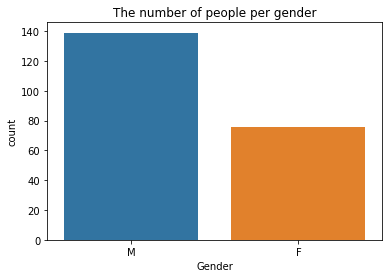

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df_N['gender'])
plt.title("The number of people per gender")
plt.xlabel("Gender")
plt.ylabel("count")
plt

The above graph shows that number of males is more then the number of females. Here we can see that number of males is around 140 and the number of females is aroung 60, so we can see that number of females in the dataset is substantially less than the number of males

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

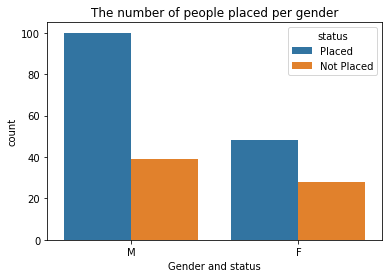

In [318]:
sns.countplot(x=df_N['gender'],hue=df_N['status'])
plt.title("The number of people placed per gender")
plt.xlabel("Gender and status")
plt.ylabel("count")
plt

The above graph shows that number of males getting placed is more then the number of females getting placed and the number of males left unplaced and the number of females left unplaced are similar in number

In [319]:
df_N[(df_N['M']==1) & (df_N['status']=='Placed')].count()[:1],df_N[(df_N['M']==1) & (df_N['status']=='Not Placed')].count()[:1]

(sl_no    100
 dtype: int64,
 sl_no    39
 dtype: int64)

From here we can infer that the exact number of males getting placed is 100 and those who are not placed are 39 so out of the total 139 males about 28% of males were not placed and 72% of males were placed

In [320]:
df_N[(df_N['F']==1) & (df_N['status']=='Placed')].count()[:1],df_N[(df_N['F']==1) & (df_N['status']=='Not Placed')].count()[:1]

(sl_no    48
 dtype: int64,
 sl_no    28
 dtype: int64)

A similar analysis is done to find the exact number of females getting placed we find that number of females getting placed is 48 and the number of females not getting placed is 28 and in proportion we find that the proportion of females getting placed is 63% and thoose not getting placed form 27% of the total 

Now we attempt to analyse the specialization in MBA

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

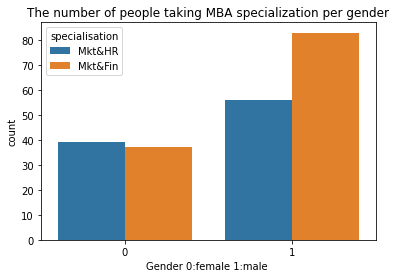

In [321]:

sns.countplot(x=df_N['M'],hue=df_N['specialisation'])
plt.title("The number of people taking MBA specialization per gender")
plt.xlabel("Gender 0:female 1:male ")
plt.ylabel("count")
plt


The analysis shows that the number of males in mkt and HR is more than those in Mkt and Fin and the number of females in these courses is similar in number

Now we analze the stream with status of the people in different stream 

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

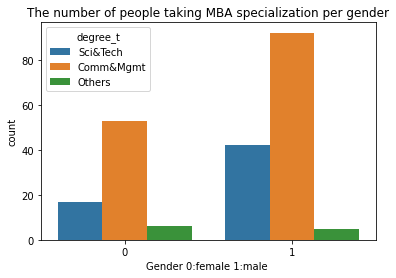

In [322]:
sns.countplot(x=df_N['M'],hue=df_N['degree_t'])
plt.title("The number of people taking MBA specialization per gender")
plt.xlabel("Gender 0:female 1:male ")
plt.ylabel("count")
plt


1. The number of males and females in comm and mgmt is more than those in other branches

In [323]:
sum_of_degree_male=df_N.groupby('degree_p')['M'].sum().reset_index()

In [324]:
sum_of_degree_male[sum_of_degree_male['M']>0].mean()

degree_p    65.965385
M            2.138462
dtype: float64

The average percentage for males in degree is 65.96

In [325]:
sum_of_degree_male=df_N.groupby('degree_p')['F'].sum().reset_index()
sum_of_degree_male[sum_of_degree_male['F']>0].mean()

degree_p    68.783111
F            1.688889
dtype: float64

The average percentage for females in degree is 68.78

In [326]:
df_N['degree_p'].describe()

count    215.000000
mean      66.370186
std        7.358743
min       50.000000
25%       61.000000
50%       66.000000
75%       72.000000
max       91.000000
Name: degree_p, dtype: float64

The max value in degree percentage is 91 and min vaue is 50

We attempt to analyze the percentage 

To make the visualization easier since we have a lot of different values in percentage we put the percenatge in range of 5 in bins with value of bin ranging from the maximum and the minimum values which has been done in the following code cell

In [327]:
df_N['deg_p'] = pd.cut(x=df_N['degree_p'], bins=[50,55,60,65,70,75,80,85,90,95], labels=['50','55', '60', '65','70','75','80','85','90'])

The degree_p column is transformed into differnet bins with one bin representing all the values in the range of 5

We try to analyze the different percentage achieved by males

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

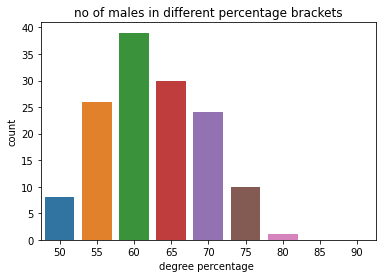

In [328]:
sns.countplot(df_N[df_N['M']==1]['deg_p'])
plt.title("no of males in different percentage brackets")
plt.xlabel("degree percentage ")
plt.ylabel("count")
plt

The graph shows the amount of males having differnt percentages. we can see that the number of people in the bracket of 55-60 is the maximum and the number os around 38, further next in the list is the number of people having pecentage in the range 65-70 and the number of people in the range is around 30 then we have similar number of people in the range 65-70 and 50-55 with the nummber being around 25 also we can see that the max percenatge in males is around 85 with no one above that

We try to analyze the different percentage achieved by females

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

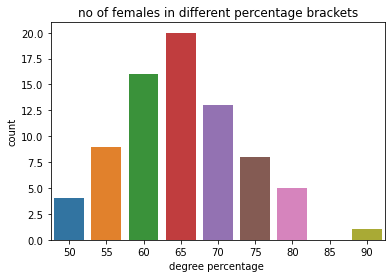

In [329]:
sns.countplot(df_N[df_N['F']==1]['deg_p'])
plt.title("no of females in different percentage brackets")
plt.xlabel("degree percentage ")
plt.ylabel("count")
plt

The graph shows the amount of males having differnt percentages. we can see that the number of people in the bracket of 60-65 is the maximum and the number os around 20, further next in the list is the number of people having pecentage in the range 55-60 and the number of people in the range is around 16 then we have number of people in the range 65-70 with the nummber being around 13, we cna see that the max percentage in females is around 90

In [330]:
df_N['mba_p'].describe()  #here we see the description of mba_p column

count    215.000000
mean      62.278186
std        5.833385
min       51.210000
25%       57.945000
50%       62.000000
75%       66.255000
max       77.890000
Name: mba_p, dtype: float64

This shows the range of marks in mba ranging from 51.21 as the lowest and 77.89 as the highest hence the range of the column is around 27

To make the visualization easier since we have a lot of different values in percentage we put the percenatge in range of 5 in bins with value of bin ranging from the maximum and the minimum values which has been done in the following code cell

In [331]:
df_N['mb_p'] = pd.cut(x=df_N['mba_p'], bins=[50,55,60,65,70,75,80], labels=['50','55', '60', '65','70','75'])

The mba_p column is transformed into differnet bins with one bin representing all the values in the range of 5

We try to analyze the number of males having differnt percentage in MBA

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

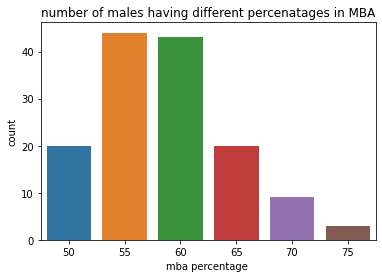

In [332]:
sns.countplot(df_N[df_N['M']==1]['mb_p'])
plt.title("number of males having different percenatages in MBA")
plt.xlabel("mba percentage ")
plt.ylabel("count")
plt

We can see that the max number of males scored a percentage in range of 50-55 and the number of such males is more than 40 and a close second are the males who scored in the bracket of 55-60, the least number of males scored in percentage bracket of 70-75

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

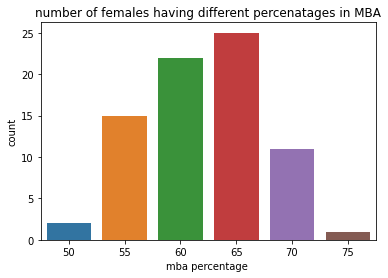

In [333]:
sns.countplot(df_N[df_N['F']==1]['mb_p'])
plt.title("number of females having different percenatages in MBA")
plt.xlabel("mba percentage ")
plt.ylabel("count")
plt

We can see that the max number of females scored a percentage in range of 60-65 and the number of such females is around 25 and  second in the list  are the females who scored in the bracket of 55-60, the least number of males scored in percentage bracket of 70-75

In [334]:
avg_males=df_N.groupby('mb_p')['M'].sum().reset_index()
total_val=0
total_males=0
for i,j in zip(avg_males['M'].astype(int),avg_males['mb_p'].astype(int)):
    total_val=total_val+i*j
    total_males=total_males+i

In [335]:
print(total_val/total_males)

58.669064748201436


The average percentage for males in mba is 58.66

In [336]:
avg_females=df_N.groupby('mb_p')['F'].sum().reset_index()
total_val=0
total_females=0
for i,j in zip(avg_females['F'].astype(int),avg_females['mb_p'].astype(int)):
    total_val=total_val+i*j
    total_females=total_females+i
print(total_val/su)

62.03947368421053






The average percentage for females in mba is 62.04

###  Is work experience affecting the placement statics

Here we try to relate the work experience with the status

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

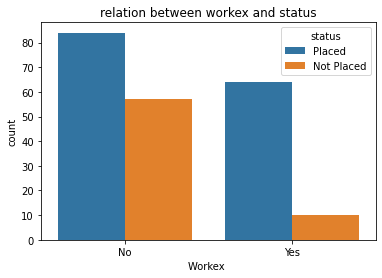

In [337]:
sns.countplot(x=df_N['workex'],hue=df_N['status'])
plt.title("relation between workex and status")
plt.xlabel("Workex ")
plt.ylabel("count")
plt

here we can see that those with work ex are around 70 with 60 of them getting placed and around 10 are not placed compared to those not having workex, we find that around 80 of them are placed and 55 of them are not placed so in percentage those eho had workex among them 85% of them got placed and around 155 of them were not placed and those with no workex 57% of them got placed and around 43% of them were not placed hence it shows that the workex matters and those with workex have better chance of getting placed

### Are percentage really helpful for getting placed?

Here we try to analyse the people in different percentage brackets and their status of placement

The folllowing code cell has been used to compare percentage in MBA with placement status

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

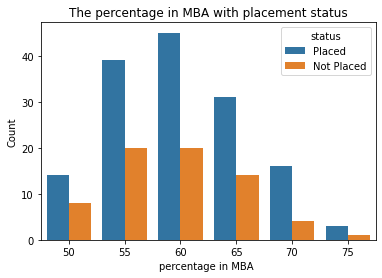

In [338]:
sns.countplot(x=df_N['mb_p'],hue=df_N['status'])
plt.title("The percentage in MBA with placement status")
plt.xlabel("percentage in MBA ")
plt.ylabel("Count")
plt

the number of people having score around 60 and getting placed are the most and next maximum number of people getting placed is in bracket of 50-55 and the number of people not getting placed in both these brackets are similar and the number is around 20, the least number of people getting placed is in the bracket of percentage 70-75

The folllowing code cell has been used to compare percentage in degree with placement status

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

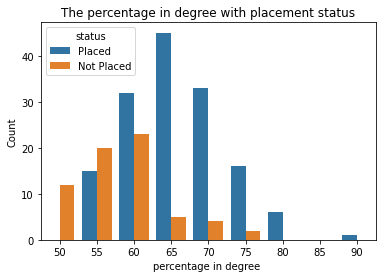

In [339]:
sns.countplot(x=df_N['deg_p'],hue=df_N['status'])
plt.title("The percentage in degree with placement status")
plt.xlabel("percentage in degree ")
plt.ylabel("Count")
plt

the number of people having score around 65 and getting placed are the most and the number is more than 40 and next maximum number of people getting placed is in bracket of 65-70 , the least number of people getting placed is in the bracket of percentage 80-85, and we can see that there are no people who got placed with percentage in degree less than  50

### Which stream enables chances at getting better salary?

Here we try to relate the stream with the salary

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

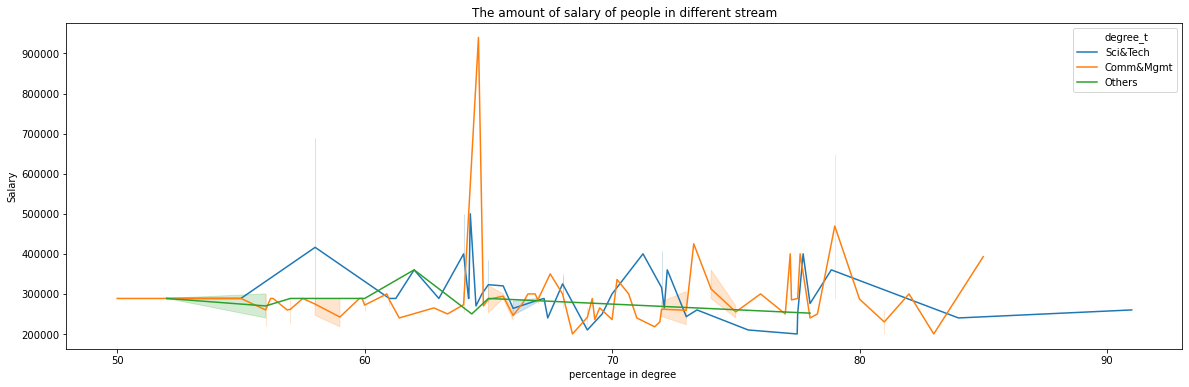

In [340]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.lineplot(df_N['degree_p'],df_N['salary'],hue=df_N['degree_t'])
plt.title("The amount of salary of people in different stream")
plt.xlabel("percentage in degree ")
plt.ylabel("Salary")
plt


Graph plotted between degree percentage , salary and stream we come to a conclusion people in comm and mgt  stream have ended u with higher maximum salary at a percentage of around 65 and the salary at other percentage for people at different percentages have been similar baring those at 65 and around 80%, the maximum salary has been around 900000 for people in comm and mgmt branch and people with higher percentages don't seem to have similar success

Now we analyze people in different MBA specialization

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

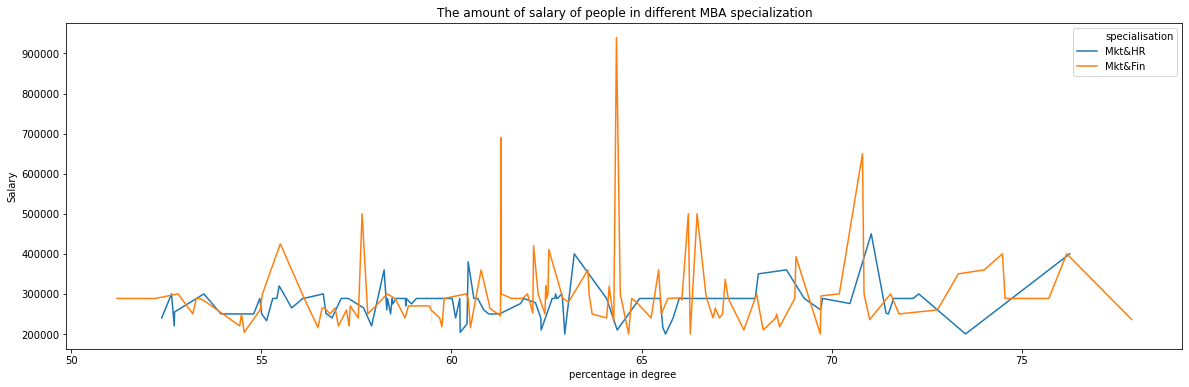

In [341]:

plt.figure(figsize=(20,6))
sns.lineplot(df_N['mba_p'],df_N['salary'],hue=df_N['specialisation'])
plt.title("The amount of salary of people in different MBA specialization")
plt.xlabel("percentage in degree ")
plt.ylabel("Salary")
plt

We see that as was the trend in differnt stream here too people with higher percentage don't seem to have great success as compared to those at percentage arounf 65 as people with percentage around 65 have a maximum salary of 900000 which is much higher compared to any other peaks where peaks representing the salary.Here people with specializzation in Mkt and Fin seem to have  an upper hand at salary drawn compared to those having specialization in Mkt and HR

In [342]:
df_N.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,F,M,deg_p,mb_p
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,0,1,55,55
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,0,1,75,65
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,0,1,60,55
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,0,1,50,55
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,0,1,70,55


### Which streams have a better chance of getting placed?

Now we analyse the stream of people in accordane with the number of placement

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

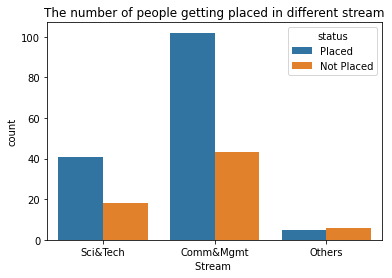

In [343]:
sns.countplot(df_N['degree_t'],hue=df_N['status'])
plt.title("The number of people getting placed in different stream")
plt.xlabel("Stream ")
plt.ylabel("count")
plt


As we found in above graph as well people in comm and mgt stream are getting placed in more numbers we find that the number of people getting placed in commerce and management stream are around 100 and those not getting placed are around 40 while the next stream in the list is Sci and tech with number of those placed around 40 and those not getting placed are 20 while the last in the list are other branches with a small number of those getting placed and not placed

## DATA PREPARATION

The following cells are used to prepare the data so that it can be good for modelling, main aim is to convert all categorical variables into numerical

In [344]:
df_a=df_N.drop('gender',axis=1)

In [345]:
df_a["ssc_b"] = df_a["ssc_b"] .astype('category') ## ssc_b column is coded into numerical value
df_a["ssc_b_cat"] = df_a["ssc_b"].cat.codes
df_a=df_a.drop('ssc_b',axis=1)


In [346]:
df_a["hsc_b"] = df_a["hsc_b"] .astype('category') ## hsc_b column is coded into numerical value
df_a["hsc_b_cat"] = df_a["hsc_b"].cat.codes
df_a=df_a.drop('hsc_b',axis=1)

In [347]:
df_a["workex"] = df_a["workex"] .astype('category') ## workex column is coded into numerical value
df_a["workex_cat"] = df_a["workex"].cat.codes
df_a=df_a.drop('workex',axis=1)

In [348]:
df_a["specialisation"] = df_a["specialisation"] .astype('category') ## specialization column is coded into numerical value
df_a["specialisation_cat"] = df_a["specialisation"].cat.codes
df_a=df_a.drop('specialisation',axis=1)

In [349]:
df_a["status"] = df_a["status"] .astype('category') ## status column is coded into numerical value
df_a["status_cat"] = df_a["status"].cat.codes
df_a=df_a.drop('status',axis=1)

In [350]:
df_a.head()

,sl_no,ssc_p,hsc_p,hsc_s,degree_p,degree_t,etest_p,mba_p,salary,F,M,deg_p,mb_p,ssc_b_cat,hsc_b_cat,workex_cat,specialisation_cat,status_cat
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,55.0,58.80,270000.000000,0,1,55,55,1,1,0,1,1
1,2,79.33,78.33,Science,77.48,Sci&Tech,86.5,66.28,200000.000000,0,1,75,65,0,1,1,0,1
2,3,65.00,68.00,Arts,64.00,Comm&Mgmt,75.0,57.80,250000.000000,0,1,60,55,0,0,0,0,1
3,4,56.00,52.00,Science,52.00,Sci&Tech,66.0,59.43,288655.405405,0,1,50,55,0,0,0,1,0
4,5,85.80,73.60,Commerce,73.30,Comm&Mgmt,96.8,55.50,425000.000000,0,1,70,55,0,0,0,0,1


In [351]:
data=pd.get_dummies(df_N['hsc_s']) ## hsc_s column is dummied
df_a=df_a.join(data)

In [352]:
data=pd.get_dummies(df_N['degree_t']) ## hsc_s column is dummied
df_a=df_a.join(data)

In [353]:
df_a.head()

,sl_no,ssc_p,hsc_p,hsc_s,degree_p,degree_t,etest_p,mba_p,salary,F,...,hsc_b_cat,workex_cat,specialisation_cat,status_cat,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,55.0,58.80,270000.000000,0,...,1,0,1,1,0,1,0,0,0,1
1,2,79.33,78.33,Science,77.48,Sci&Tech,86.5,66.28,200000.000000,0,...,1,1,0,1,0,0,1,0,0,1
2,3,65.00,68.00,Arts,64.00,Comm&Mgmt,75.0,57.80,250000.000000,0,...,0,0,0,1,1,0,0,1,0,0
3,4,56.00,52.00,Science,52.00,Sci&Tech,66.0,59.43,288655.405405,0,...,0,0,1,0,0,0,1,0,0,1
4,5,85.80,73.60,Commerce,73.30,Comm&Mgmt,96.8,55.50,425000.000000,0,...,0,0,0,1,0,1,0,1,0,0


## DATA MODELLING

The following cells are used for modelling the data we are trying to predict whether the person would be placed or not so the target variable here is status column

### choosing the feature variables

In [354]:
features=df_a[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary','M','F','ssc_b_cat','hsc_b_cat','workex_cat','specialisation_cat','Arts','Commerce','Science','Comm&Mgmt','Others','Sci&Tech']]

In [355]:
features.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,M,F,ssc_b_cat,hsc_b_cat,workex_cat,specialisation_cat,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,67.00,91.00,58.00,55.0,58.80,270000.000000,1,0,1,1,0,1,0,1,0,0,0,1
1,79.33,78.33,77.48,86.5,66.28,200000.000000,1,0,0,1,1,0,0,0,1,0,0,1
2,65.00,68.00,64.00,75.0,57.80,250000.000000,1,0,0,0,0,0,1,0,0,1,0,0
3,56.00,52.00,52.00,66.0,59.43,288655.405405,1,0,0,0,0,1,0,0,1,0,0,1
4,85.80,73.60,73.30,96.8,55.50,425000.000000,1,0,0,0,0,0,0,1,0,1,0,0


### choosing the target variable

In [356]:
target=df_a['status_cat']

In the following cell we have scaled the feature variable down so that no variable is dominant in the model

In [357]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
scaler = MinMaxScaler()
to_normalize = ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']

features[to_normalize] = scaler.fit_transform(features[to_normalize])
features.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,M,F,ssc_b_cat,hsc_b_cat,workex_cat,specialisation_cat,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,0.538240,0.889621,0.195122,0.104167,0.284483,0.094595,1,0,1,1,0,1,0,1,0,0,0,1
1,0.792414,0.680890,0.670244,0.760417,0.564843,0.000000,1,0,0,1,1,0,0,0,1,0,0,1
2,0.497011,0.510708,0.341463,0.520833,0.247001,0.067568,1,0,0,0,0,0,1,0,0,1,0,0
3,0.311482,0.247117,0.048780,0.333333,0.308096,0.119805,1,0,0,0,0,1,0,0,1,0,0,1
4,0.925788,0.602965,0.568293,0.975000,0.160795,0.304054,1,0,0,0,0,0,0,1,0,1,0,0


In [358]:
target.head()

0    1
1    1
2    1
3    0
4    1
Name: status_cat, dtype: int8

### MODEL CHOOSEN

Here we are using decision tree classifier to classify the people into placed or not placed

In [359]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [360]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2) # the dataset is divided into training and testing set

Here the classifier is fitted to the model using the train data and the prediction is done on the testing data

In [361]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

## EVALUATION OF RESULTS

![](http://)The svaluation metric chosen here is accuracy since we need to classify so matching the predicted label to original label will give accuracy which seems like an apropriate metric 

In [362]:

print(accuracy_score(y_test, y_pred))


1.0


Further we have calculated F1 score and subsequently we have calculated precision and recall using classification_report from sklearn

In [363]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        32

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



* We end up with accuracy of 100%

## CONCLUSION

We conclude that work experience matters and leads to better placement, percentage aren’t the right measure to predict whether a person will be placed or not, further people in comm and Management have higher chances of getting placed and similarly those doing MBA specialization in Marketing and fin have higher chance of getting placed and with higher salary. 